#### Non-Linear Classification

In [2]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [3]:
X,Y = make_circles(n_samples=500,noise=0.02)
print(X.shape,Y.shape)

(500, 2) (500,)


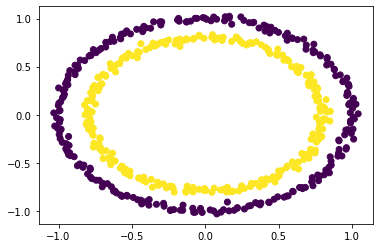

In [20]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [21]:
def phi(X):
    ## Non Linear Transformation
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X1**2 + X2**2
    
    X_ = np.zeros((X.shape[0],3))
    print(X_.shape)
    
    X_[:,:-1] = X
    X_[:,-1] = X3

    return X_

In [22]:
X_ = phi(X)

(500, 3)


In [23]:
print(X_[:10,:])

[[-0.70266822 -0.37457088  0.63404596]
 [-0.31895453 -0.72856914  0.63254498]
 [ 0.59785324 -0.80090341  0.99887477]
 [ 0.38241176 -0.67650158  0.60389314]
 [ 1.00959407 -0.2536349   1.08361085]
 [-0.71486558 -0.34254981  0.62837318]
 [ 0.55790491  0.57121264  0.63754177]
 [-0.00911245  0.79500704  0.63211923]
 [-0.80168349 -0.61590753  1.0220385 ]
 [ 1.04037606  0.00930712  1.08246896]]


In [24]:
def plot3d(X,show=True):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111,projection='3d')
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X[:,2]
    ax.scatter(X1,X2,X3,zdir='z',s=20,c=Y,depthshade=True)
    
    if(show==True):
        plt.show()
    return ax

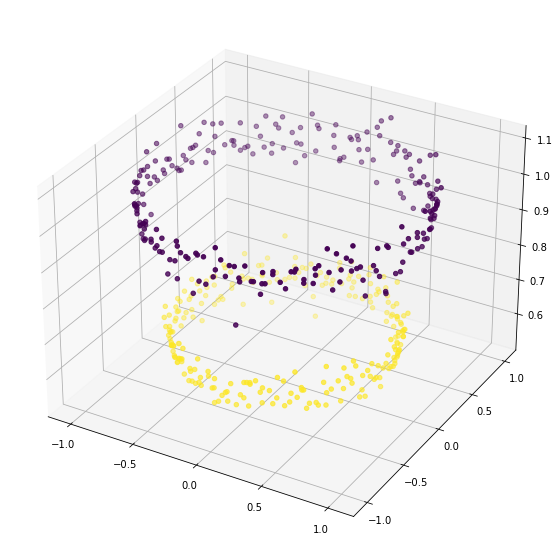

In [25]:
ax = plot3d(X_)

In [26]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [27]:
lr = LogisticRegression()

In [28]:
acc = cross_val_score(lr,X,Y,cv=5).mean()
print("Accuracy X(2D) is %.4f"%(acc*100))

Accuracy X(2D) is 44.6000


In [29]:
acc = cross_val_score(lr,X_,Y,cv=5).mean()
print("Accuracy X(3D) is %.4f"%(acc*100))

Accuracy X(3D) is 100.0000


In [30]:
## Visualise the Decision Surface
lr.fit(X_,Y)

LogisticRegression()

In [31]:
wts = lr.coef_
print(wts)
bias = lr.intercept_
print(bias)

[[ 9.57976602e-03  5.12867087e-03 -1.08460266e+01]]
[8.88536578]


In [32]:
xx,yy = np.meshgrid(range(-2,2),range(-2,2))
print(xx)
print(yy)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [33]:
z = -(wts[0,0]*xx + wts[0,1]*yy+bias)/wts[0,2]
print(z)

[[0.81651551 0.81739876 0.81828201 0.81916526]
 [0.81698837 0.81787162 0.81875487 0.81963812]
 [0.81746123 0.81834448 0.81922773 0.82011098]
 [0.81793409 0.81881734 0.81970059 0.82058385]]


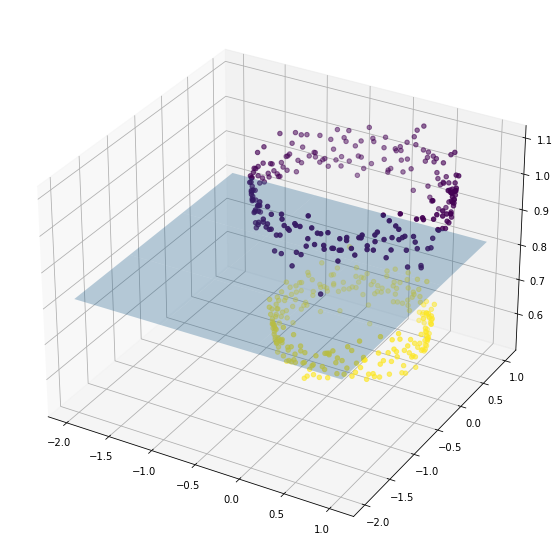

In [34]:
ax = plot3d(X_,False)
ax.plot_surface(xx,yy,z,alpha=0.3)
plt.show()

##### Kernel Based Classifcation in SVM's

In [36]:
from sklearn import svm

In [37]:
## Linear Kernel SVM
svc = svm.SVC(kernel="linear")
svc.fit(X,Y)
svc.score(X,Y)

0.506

In [38]:
## RBF Kernel SVM
svc = svm.SVC(kernel="rbf")
svc.fit(X,Y)
svc.score(X,Y)

1.0

In [39]:
## Polynomial Kernel
svc = svm.SVC(kernel="poly")
svc.fit(X,Y)
svc.score(X,Y)

0.596

In [40]:
## Custom Kernel
def custom_kernel(x1,x2):
    return np.square(np.dot(x1,x2.T))

svc = svm.SVC(kernel=custom_kernel)
svc.fit(X,Y)
svc.score(X,Y)

1.0